In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras import datasets, layers, models
import torch 

In [4]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 定义图像尺寸
IMG_HEIGHT, IMG_WIDTH = 48, 48

In [5]:
# 构建卷积神经网络模型
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),  # 添加 Dropout 层
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 初始化模型
cnn_model = build_cnn_model()
cnn_model.summary()

C:\Users\小豆\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,673,985 (6.39 MB)

 Trainable params: 1,673,985 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(['sad', 'happy']):
        subfolder_path = os.path.join(folder, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            try:
                img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder('archive/train')
test_images, test_labels = load_images_from_folder('archive/test')

In [8]:
# 数据归一化
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 打印图像和标签的形状
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

# 分割训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

Train images shape: (12044, 48, 48, 1)
Train labels shape: (12044,)
Test images shape: (3021, 48, 48, 1)
Test labels shape: (3021,)


In [9]:
# 训练模型
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6023 - loss: 0.6557 - val_accuracy: 0.7335 - val_loss: 0.5372
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7448 - loss: 0.5122 - val_accuracy: 0.7621 - val_loss: 0.4741
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.7840 - loss: 0.4484 - val_accuracy: 0.7962 - val_loss: 0.4193
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8229 - loss: 0.3875 - val_accuracy: 0.7978 - val_loss: 0.4105
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8368 - loss: 0.3514 - val_accuracy: 0.8061 - val_loss: 0.4410
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.8552 - loss: 0.3151 - val_accuracy: 0.8178 - val_loss: 0.3886
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.8896 - loss: 0.2692 - val_accuracy: 0.8236 - val_loss: 0.3863
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9082 - loss: 0.2211 - val_a

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8239 - loss: 0.5049
Test loss: 0.45352619886398315, Test accuracy: 0.8325058221817017
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


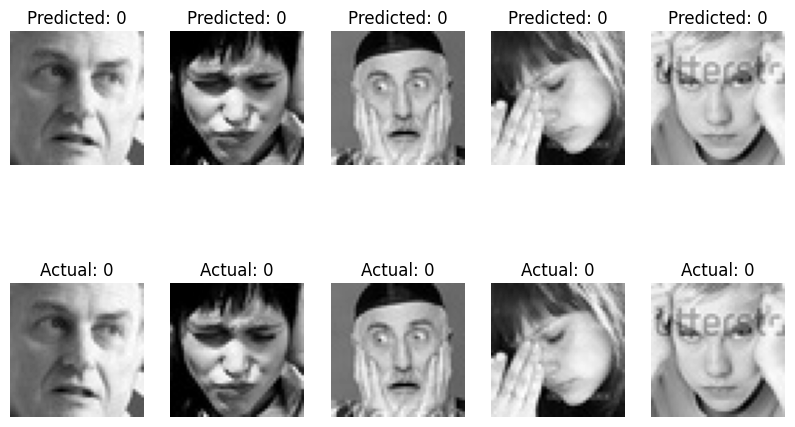

In [10]:
# 评估模型
loss, acc = cnn_model.evaluate(test_images, test_labels)
print(f"Test loss: {loss}, Test accuracy: {acc}")

# 使用模型进行预测
predictions = cnn_model.predict(test_images)
predictions = (predictions > 0.5).astype(int)

# 可视化一些结果
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
    plt.title('Predicted: {}'.format(predictions[i][0]))
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(test_images[i].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
    plt.title('Actual: {}'.format(test_labels[i]))
    plt.axis('off')
plt.show()


In [11]:
predictions = cnn_model.predict(test_images)
predictions = (predictions > 0.5).astype(int)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [15]:
# 定义图像尺寸
IMG_HEIGHT, IMG_WIDTH = 48, 48

def load_and_preprocess_image(image_path):
    """
    加载并预处理单张图片
    :param image_path: 图片的路径
    :return: 预处理后的图片数组
    """
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # 增加一个维度，以匹配模型的输入
    img_array /= 255.0  # 归一化
    return img_array

#image_path_sad = 'D:\大学\科研\Team of ai\Homework_test_note\sad.jpg' 
image_path_happy ='D:\大学\科研\Team of ai\入门\Homework_test_note\happy.jpg'
image_path_jy ='D:\大学\科研\Team of ai\入门\Homework_test_note\jy.jpg'
#image_sad = load_and_preprocess_image(image_path_sad)
image_happy = load_and_preprocess_image(image_path_happy)
image_jy = load_and_preprocess_image(image_path_jy)

<>:17: SyntaxWarning: invalid escape sequence '\T'
<>:18: SyntaxWarning: invalid escape sequence '\T'
<>:17: SyntaxWarning: invalid escape sequence '\T'
<>:18: SyntaxWarning: invalid escape sequence '\T'
C:\Users\小豆\AppData\Local\Temp\ipykernel_27944\4032325203.py:17: SyntaxWarning: invalid escape sequence '\T'
  image_path_happy ='D:\大学\科研\Team of ai\入门\Homework_test_note\happy.jpg'
C:\Users\小豆\AppData\Local\Temp\ipykernel_27944\4032325203.py:18: SyntaxWarning: invalid escape sequence '\T'
  image_path_jy ='D:\大学\科研\Team of ai\入门\Homework_test_note\jy.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: Happy (0.66)


C:\Users\小豆\AppData\Local\Temp\ipykernel_27944\1320494417.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(prediction > 0.5)


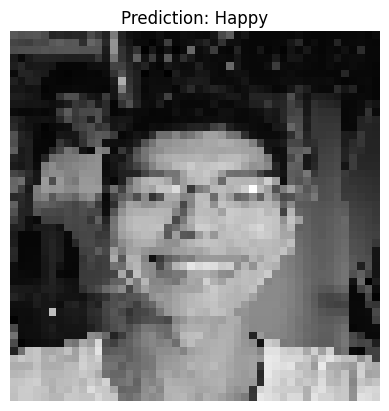

In [16]:
from tensorflow.keras.models import load_model

#model = load_model('cnn_model.h5')

prediction = cnn_model.predict(image_happy)
predicted_label = int(prediction > 0.5)
# 打印预测结果
print(f"Prediction: {'Happy' if predicted_label == 1 else 'Not Happy'} ({prediction[0][0]:.2f})")
plt.imshow(image_happy[0].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
plt.title(f"Prediction: {'Happy' if predicted_label == 1 else 'Not Happy'}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Not Happy (0.00)


C:\Users\小豆\AppData\Local\Temp\ipykernel_27944\1302656805.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(prediction > 0.5)


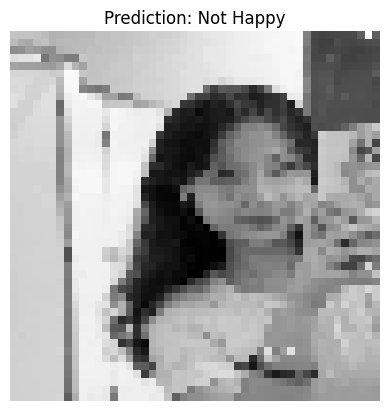

In [17]:
prediction = cnn_model.predict(image_jy)
predicted_label = int(prediction > 0.5)
# 打印预测结果
print(f"Prediction: {'Happy' if predicted_label == 1 else 'Not Happy'} ({prediction[0][0]:.2f})")
plt.imshow(image_jy[0].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
plt.title(f"Prediction: {'Happy' if predicted_label == 1 else 'Not Happy'}")
plt.axis('off')
plt.show()